<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

-Alvaro Morales S.

-Eduardo Faundez C.


*texto en cursiva*### **Link de repositorio de GitHub:** https://github.com/AlvaroMoralesS/Lab_Faundez_Morales`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [131]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/diabetes_data.csv")
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

In [ ]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="EDA")
#profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [132]:
#analizis en base a eda
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [133]:
df.duplicated().sum()

6672

In [134]:
#bajo los anlisis del EDA , se ha decido elimianr variables correlacionas y desbalceadas
#no hay variables categoricas , solo numericas, flotantes y/0 ordinales
#eliminacion de variables
desbalanceadas=['CholCheck','HvyAlcoholConsump','Stroke','PhysHlth','MentHlth']
df=df.drop(desbalanceadas, axis=1)

df = df.drop_duplicates()#eliminacion de duplicados




In [135]:
from sklearn.model_selection import train_test_split
X =df.drop(['Diabetes',], axis=1)
y =df['Diabetes']
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,RobustScaler,OrdinalEncoder
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin

ordinal=['GenHlth']#unica variable ordinal
minmax=['Age']# ajustaba mejor minmax que standarscaler
loga=['BMI']#poseia valor extremos  asi aplico logratimica y luego minmax


class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X)

# Definir las transformaciones

log_transformer = LogTransformer()
transformaciones = [
    ('logaritmica', log_transformer, loga),
    ('mixmx', MinMaxScaler(), minmax),
    ('mixmxz', MinMaxScaler(), loga),
    ('ordinal', OrdinalEncoder(), ordinal)
]

preprocesador = ColumnTransformer(transformaciones, remainder='passthrough')


En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [9]:
!pip install xgboost

In [137]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import xgboost as xgb

pipeline_xgboost = Pipeline([
    ('preprocesador', preprocesador),
   ('clasificador', xgb.XGBClassifier())
])

pipeline_xgboost.fit(X_train, y_train)
y_test_pred_xgboost = pipeline_xgboost.predict(X_test)

print(classification_report(y_test,y_test_pred_xgboost))
print(confusion_matrix(y_test,y_test_pred_xgboost))


probabilidades = pipeline_xgboost.predict_proba(X_train)

# Obtener la probabilidad de la clase positiva (1)
probabilidad_tener_diabetes = probabilidades[:, 1]

              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65      4814
         1.0       0.71      0.79      0.75      5774

    accuracy                           0.71     10588
   macro avg       0.71      0.70      0.70     10588
weighted avg       0.71      0.71      0.70     10588

[[2910 1904]
 [1205 4569]]


In [138]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que deseas ajustar en la grilla
parametros = {
    'clasificador__n_estimators': [100, 200, 300],  # Ejemplo de ajuste del número de estimadores
    'clasificador__max_depth': [3, 4, 5]  # Ejemplo de ajuste de la profundidad máxima del árbol
}

# Crear el objeto GridSearchCV con tu pipeline y los parámetros definidos
grid_search = GridSearchCV(pipeline_xgboost, parametros, cv=5)

# Ajustar la grilla de búsqueda utilizando los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la grilla
mejor_modelo = grid_search.best_estimator_

# Predecir con el mejor modelo en el conjunto de prueba
y_test_pred_mejor_modelo = mejor_modelo.predict(X_test)

# Imprimir el reporte de clasificación y la matriz de confusión para el mejor modelo
print(classification_report(y_test, y_test_pred_mejor_modelo))
print(confusion_matrix(y_test, y_test_pred_mejor_modelo))

# Imprimir los mejores parámetros encontrados por la grilla
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

KeyboardInterrupt: ignored

## Respuesta
Vemos que el modelo de XGBoost entrega resultados aceptables, aunque no son excelentes. Se logró alcanzar una precisión y exactitud (accuracy) de 0.71 para ambas clases. Sin embargo, los valores de recall son bajos para la clase sana. Se trabajó con una grilla de parámetros para mejorar el modelo, pero no se observaron mejoras significativas, por lo cual se decidió trabajar con el modelo por defecto. Como no se lograron valores superiores a 0.8, no se puede considerar como un predictor excelente de diabetes, pero cumple su objetivo.

Las métricas utilizadas buscan proporcionar información sobre qué tan bien está funcionando el modelo. En este caso, la precisión nos indica la proporción de diabéticos correctamente identificados sobre el total de casos clasificados como diabéticos. Una alta precisión significa que hay menos casos clasificados como diabéticos que en realidad son sanos.

El recall indica la proporción de diabéticos correctamente identificados sobre el total de casos reales de diabéticos. Una alta sensibilidad significa que hay menos casos de diabéticos etiquetados como sanos.

Estas métricas nos ayudan a evaluar cómo el modelo está realizando las predicciones en cada clase. Sin embargo, las métricas de evaluación por sí solas no garantizan que el modelo haya seleccionado las mejores características (features). Las métricas evalúan el desempeño del modelo en función de las características utilizadas, pero no revelan directamente la calidad o relevancia de las características. Para asegurarnos de que se haya realizado una buena selección de características, es necesario realizar análisis adicionales, como evaluar la importancia de las características o utilizar técnicas de selección de características, para evaluar su contribución al modelo de manera más precisa.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

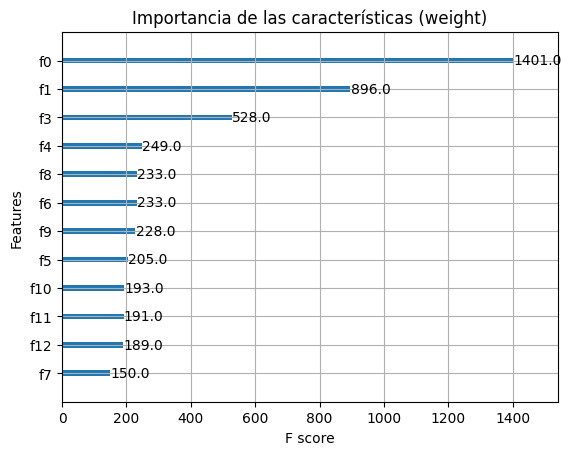

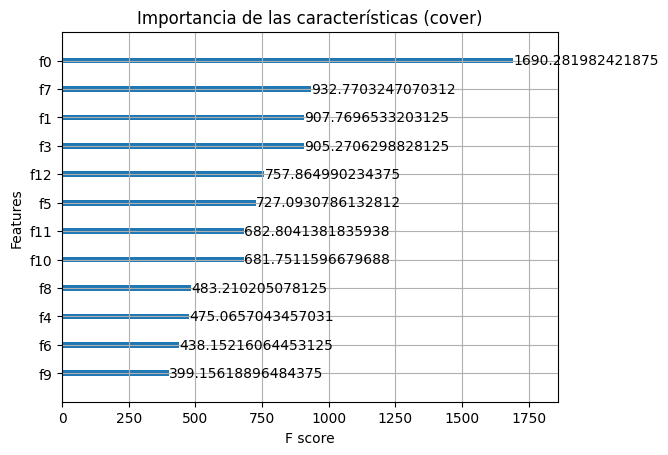

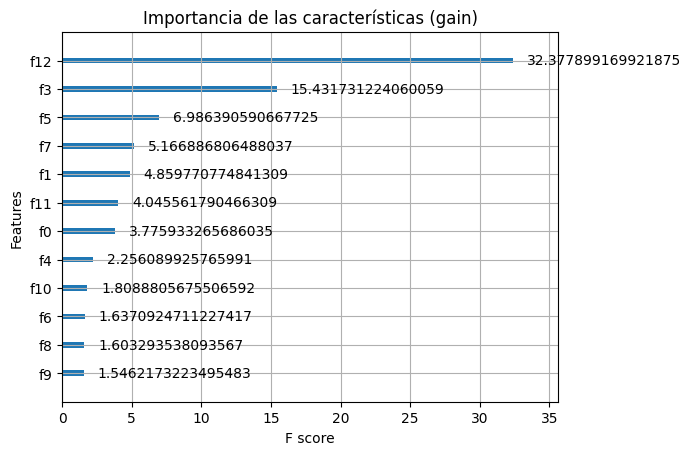

In [139]:
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Obtener la importancia de las características utilizando los diferentes métodos
feature_importance_weight = pipeline_xgboost.named_steps['clasificador'].feature_importances_
feature_importance_cover = pipeline_xgboost.named_steps['clasificador'].get_booster().get_score(importance_type='cover')
feature_importance_gain = pipeline_xgboost.named_steps['clasificador'].get_booster().get_score(importance_type='gain')


# Mostrar la importancia de las características
xgb.plot_importance(pipeline_xgboost.named_steps['clasificador'], importance_type='weight', ax=plt.gca())
plt.title("Importancia de las características (weight)")
plt.show()

xgb.plot_importance(pipeline_xgboost.named_steps['clasificador'], importance_type='cover', ax=plt.gca())
plt.title("Importancia de las características (cover)")
plt.show()

xgb.plot_importance(pipeline_xgboost.named_steps['clasificador'], importance_type='gain', ax=plt.gca())
plt.title("Importancia de las características (gain)")
plt.show()



## respuesta
al ver los resultado vemos que weight y cover poseen similitudes como indicar que la variable representada por Fo es la mas imporntante en ambos cosos, F1 y F3 tambien aparecen dentro de las 4 mas importantes, por otro lado  vemos que Gain indica que F12 es la feature mas importante pero para los dos anteiores esta es una feature  irrelevante  aunque posee una coicidencia con F3.

estas diferencias y similitudes se debe a que
El método "weight" calcula la importancia de una característica basándose en la frecuencia con la que aparece en los árboles del modelo.
El método "cover" calcula la importancia de una característica basándose en la cobertura media ponderada de los nodos en los árboles del modelo en los que aparece la característica.
El método "gain" calcula la importancia de una característica basándose en la ganancia media ponderada de la característica al dividir los nodos en los árboles del modelo.
asi estas diefrencias se deben a las diferentes métricas utilizadas para calcular la importancia y cómo se ponderan las características en cada método.

Las importancias obtenidas proporcionar interpretabilidad al modelo, ya que indican qué características son consideradas más importantes por el algoritmo. Sin embargo, deben estar sujetas a ciertos sesgos y no siempre reflejan la verdadera relevancia de las características en el problema.

Una debilidad es que la importancia de las características se calcula a nivel individual, lo que puede no tener en cuenta las interacciones entre las características. Además, la importancia relativa de las características puede variar dependiendo de los parámetros del modelo y la configuración del problema.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

GenHlth: 0.0459 +/- 0.0025
BMI: 0.0300 +/- 0.0023
Age: 0.0297 +/- 0.0025
HighBP: 0.0138 +/- 0.0018
HighChol: 0.0097 +/- 0.0020
HeartDiseaseorAttack: 0.0037 +/- 0.0014
Sex: 0.0034 +/- 0.0010
DiffWalk: 0.0015 +/- 0.0011
Smoker: -0.0000 +/- 0.0011
PhysActivity: -0.0005 +/- 0.0010
Veggies: -0.0009 +/- 0.0010
Fruits: -0.0019 +/- 0.0010


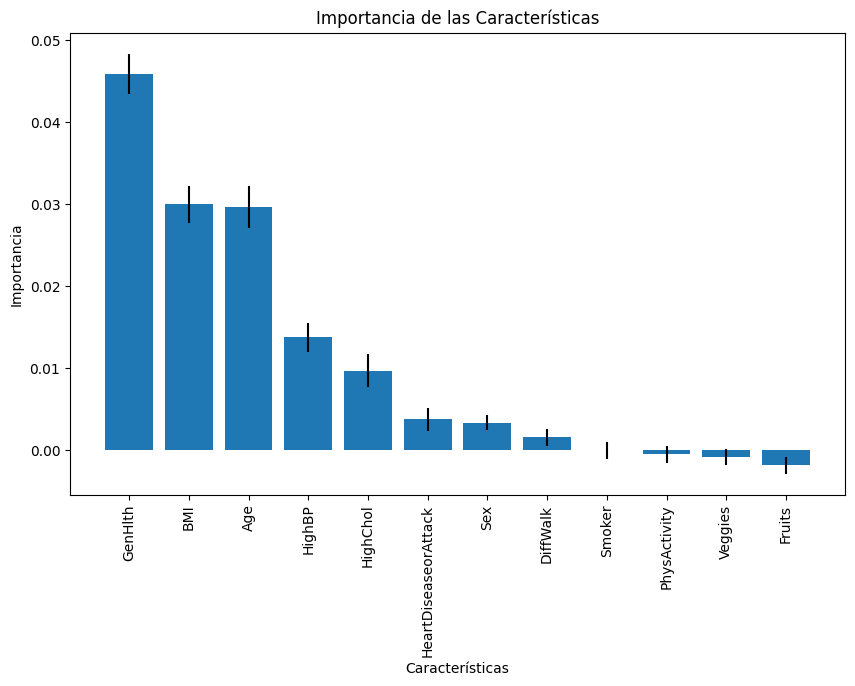

In [140]:
import numpy as np
from sklearn.inspection import permutation_importance

# Entrena el modelo con los mejores parámetros encontrados
modelo = pipeline_xgboost.named_steps['clasificador']
modelo.fit(X_train, y_train)

resultado = permutation_importance(modelo, X_test, y_test, n_repeats=30, random_state=42)

importancias = resultado.importances_mean
std = resultado.importances_std

indices = np.argsort(importancias)[::-1]


for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importancias[indices[i]]:.4f} +/- {std[indices[i]]:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importancias[indices], yerr=std[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características")
plt.show()


La desviación estándar permite evaluar la variabilidad de las importancias de las características.para el caso estos son relativamente bajos, lo que sugiere que los resultados de importancia de las características obtenidos a través del método de permutación son consistentes y confiable



La importancia de las características se mide mediante permutación en este enfoque. Se evalúa el impacto de permutar aleatoriamente los valores de una característica en la salida del modelo. Si la permutación de una característica tiene un impacto significativo en la métrica de evaluación del modelo (por ejemplo, precisión, f1-score), se considera que esa característica es importante para el modelo.

Para determinar las características con un mayor impacto en la salida del modelo, puedes utilizar los valores de importancia permutada obtenidos. Las características con una mayor importancia permutada son aquellas que, al permutar sus valores, resultan en una mayor disminución en la métrica de evaluación del modelo. Puedes verificar las 5 características con mayor importancia permutada en el gráfico generado.

Las conclusiones pueden cambiar con respecto a las importancias obtenidas anteriormente. En el método de permutación, se evalúa directamente el impacto de la permutación de las características en la salida del modelo, lo que puede proporcionar una medida más precisa de la importancia de las características en comparación con los métodos anteriores que se basaban en métricas internas de XGBoost. Además, la desviación estándar de las importancias permutadas permite tener una idea de la estabilidad de los resultados y su consistencia en diferentes iteraciones.

Ventajas del método de permutación:

Proporciona una medida directa de la importancia de las características al evaluar su impacto en el rendimiento del modelo.

No hace suposiciones sobre la distribución de los datos y puede aplicarse a diferentes tipos de modelos.

Permite evaluar la importancia relativa de las características de manera más precisa al tener en cuenta su interacción con otras características.

Desventajas del método de permutación:

Puede ser computacionalmente costoso si se requiere repetir el proceso muchas veces para obtener estimaciones de incertidumbre precisas.

No tiene en cuenta la posible correlación entre características, lo que puede llevar a una sobreestimación o subestimación de la importancia de ciertas características.

La interpretación de la importancia de las características puede depender del contexto del problema y la interpretación de los resultados puede requerir conocimientos adicionales sobre el dominio.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [13]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 30.4 MB/s eta 0:00:00


In [14]:
!pip install --upgrade shap

In [16]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


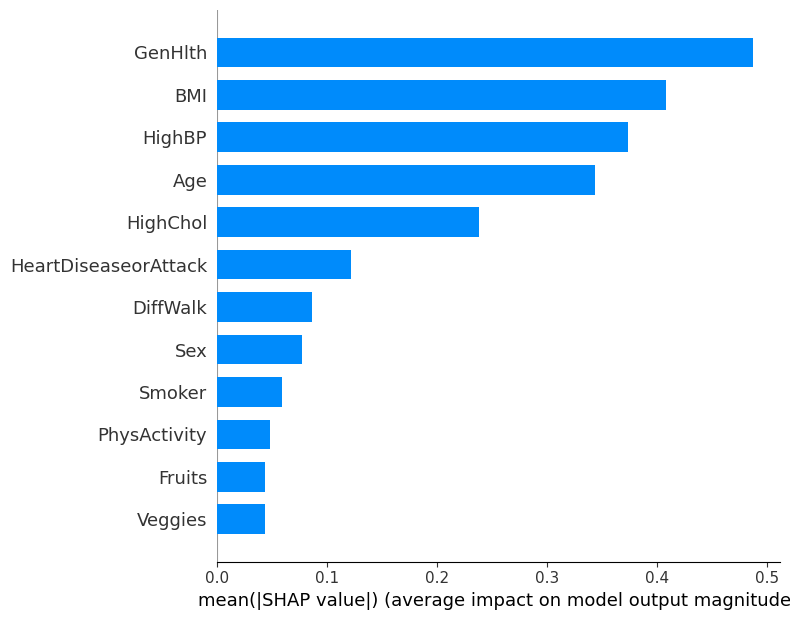

(42349, 12)

In [141]:
import shap


model = pipeline_xgboost.named_steps['clasificador']

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')
shap_values.shape

# Respuesta

El resultado de los SHAP values representa la importancia o el impacto que tiene una característica en la predicción del modelo para esa instancia en particular.

El significado de la positividad o negatividad de cada valor de SHAP depende del contexto de la característica y del tipo de modelo utilizado, un valor positivo indica que la presencia o el valor alto de esa característica aumenta la predicción del modelo en comparación con un valor de referencia, mientras que un valor negativo indica que la presencia o el valor alto de esa característica disminuye la predicción del modelo en comparación con el valor de referencia.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [142]:
# Cargar el modelo entrenado
model = pipeline_xgboost.named_steps['clasificador']
shap.initjs()

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[1], X_train.iloc[1, :])

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9], X_train.iloc[9, :])

In [25]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[150], X_train.iloc[150, :])

## Respuesta


Al observar los gráficos, los valores positivos indican un mayor aporte a la probabilidad de poseer diabetes, mientras que los valores negativos indican un aporte menor. También se puede  observar qué características tienen el mayor impacto en la probabilidad según los SHAP values, asi las feature   BMI=27, GenHilth=2,Smoker=1 indican que afectan de forma positiva ser diabetico, y HighBP=1, Smoker=0 indican que afectan negativamente ser diabetico

se encontraron bajas similitudes entre las variables que aportan positivamnete y negativamente la prob de ser diabetico
ahora no se puede generalizar automáticamente estas conclusiones a todo el dataset. Es importante recordar que los SHAP values y sus interpretaciones son específicos para cada instancia. Es posible que las características más importantes varíen para diferentes instancias en el dataset.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

 99%|===================| 10492/10588 [00:57<00:00]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


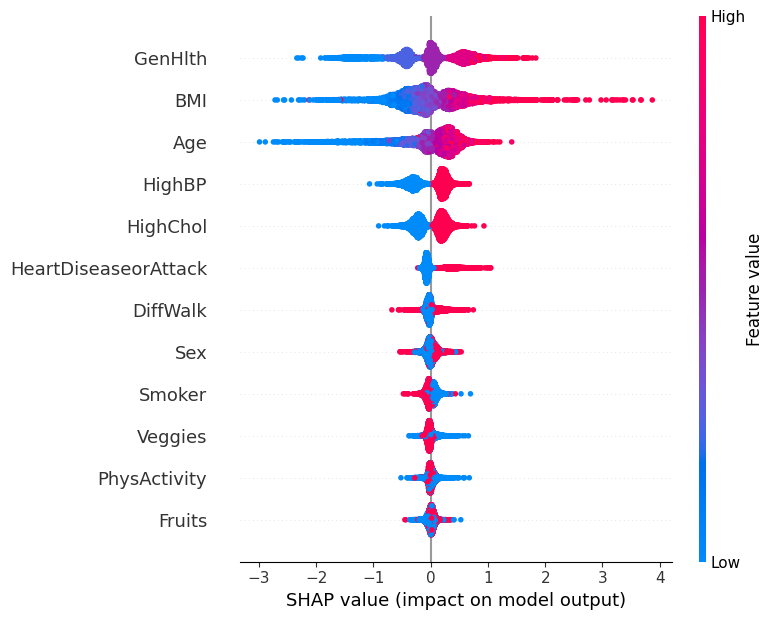

In [143]:
import shap

# Cargar el modelo entrenado
model = pipeline_xgboost.named_steps['clasificador']

explainer = shap.Explainer(model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# Respuesta
vemos que las variable de mayor relevancia son GenHlth,BMI,Age, HIghBP y HighCol, este metodo nos  permite identificar las características que tienen un impacto más significativo en las predicciones del modelo en general y no de forma especifica , generalizando el analisis

luego al comparar estas conclusiones a nivel global con las conclusiones generadas a nivel de instancia, pueden existir algunas diferencias. A nivel de instancia, se analiza cómo cada feature influye en una predicción específica para una instancia en particular. Esto permite identificar el impacto individual de las características para casos específicos.

Por otro lado, a nivel global, se analiza el impacto promedio de cada feature en todas las instancias del dataset. Esto puede revelar patrones generales y tendencias en la importancia de las características para el modelo en su conjunto.

Las diferencias pueden surgir debido a que el impacto de una característica puede variar entre las instancias, y los patrones generales pueden no ser necesariamente aplicables a cada caso individual. Por lo tanto, es importante considerar tanto el análisis a nivel de instancia como el análisis a nivel global para obtener una comprensión completa de cómo las características afectan las predicciones del modelo.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

100%|===================| 42298/42349 [03:52<00:00]       

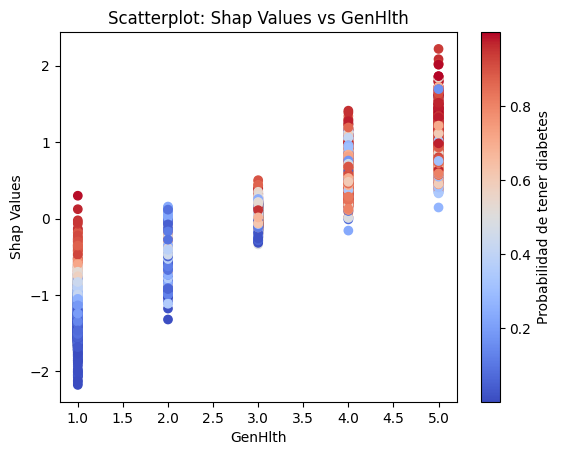

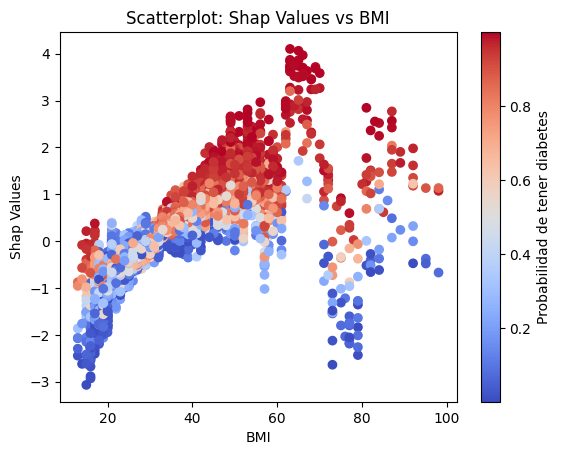

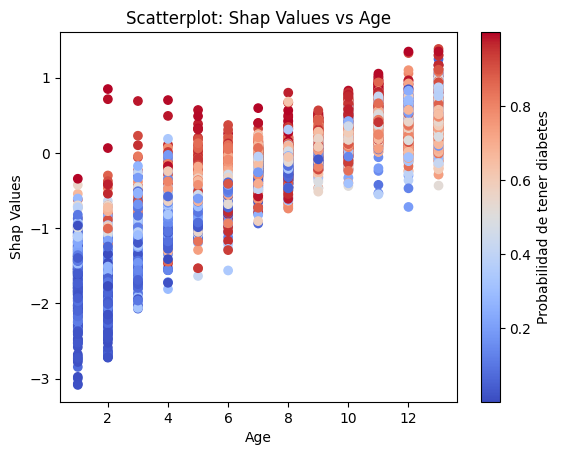

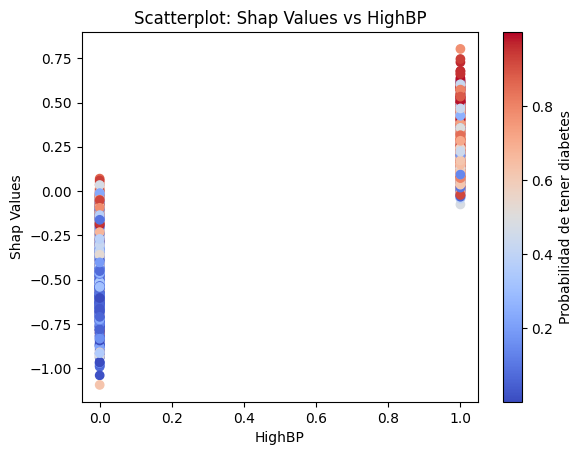

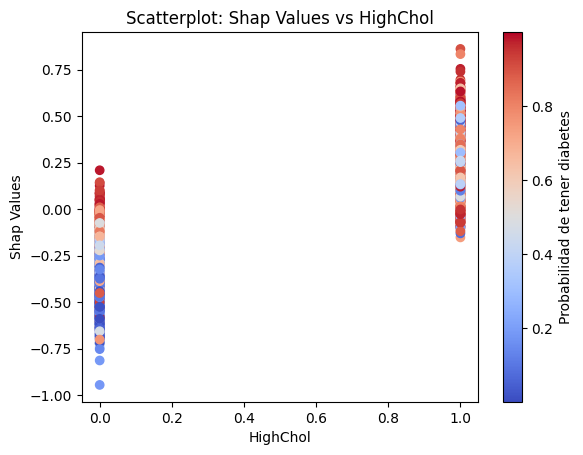

In [157]:
shap_values = explainer.shap_values(X_train)
shap_values_abs = np.mean(np.abs(shap_values), axis=0)

feature_importance_names = X_train.columns[np.argsort(shap_values_abs)[::-1]]
feature_importance_names[:5]

top_5_features = feature_importance_names[:5]

for feature_name in top_5_features:

    feature_index = X_train.columns.get_loc(feature_name)

    shap_values_feature = shap_values[:, feature_index]


    plt.scatter( X_train.iloc[:, feature_index],shap_values_feature, c=probabilidad_tener_diabetes , cmap='coolwarm')
    plt.xlabel(feature_name)
    plt.ylabel("Shap Values")
    plt.title(f"Scatterplot: Shap Values vs {feature_name}")
    plt.colorbar(label="Probabilidad de tener diabetes")
    plt.show()


# Respuesta
Para la feature "veggies", se observa que para un valor de 0, la probabilidad de ser diabético es alta cuando el SHAP value de la variable es mayor que -1. Por otro lado, para un valor de 1, la probabilidad de ser diabético es mayor cuando el SHAP value es mayor que 0.

En cuanto a la feature "GenHlth", se observa que la probabilidad de ser diabético varía para diferentes valores. Por ejemplo, para un valor de 1, la presencia de diabetes es muy baja para valores mayores a 1, casi no existen diabéticos en esta categoría. En cambio, para un valor de 5, la prevalencia de ser diabético es mayor y para cualquier valor del SHAP value de esta feature, la probabilidad es alta.

En relación a la feature "CholCheck", para un valor de 0, la probabilidad de ser diabético es prácticamente nula y solo existe para valores superiores a dos. En cambio, para un valor de 1, desde un valor de 0 del SHAP value, la probabilidad de ser diabético es alta.

En el caso de la feature "Age", se observa que a medida que aumenta la edad, la probabilidad de ser diabético también aumenta. Además, se observa que para el valor -0.5 del SHAP value, la probabilidad de ser diabético es mayor.

Por último, en la feature "HighChol", no se observa un patrón claro para la clase 0, pero para la clase 1 la mayoría son diabéticos.




### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

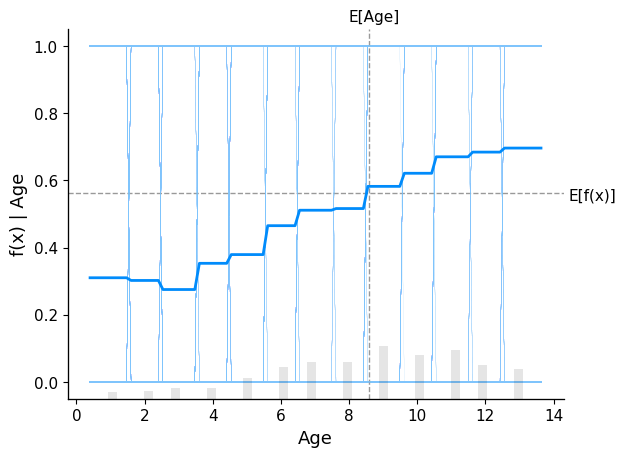

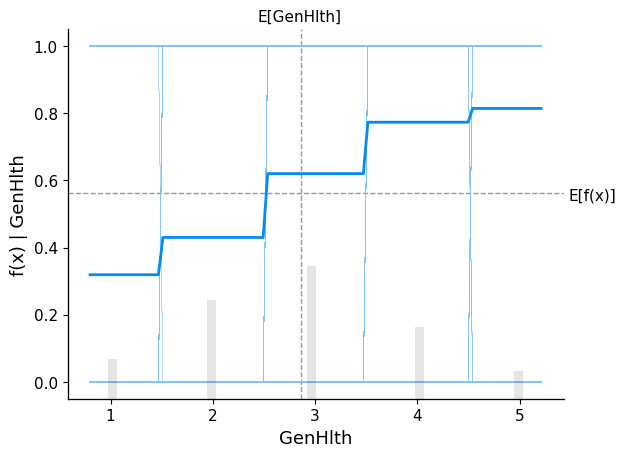

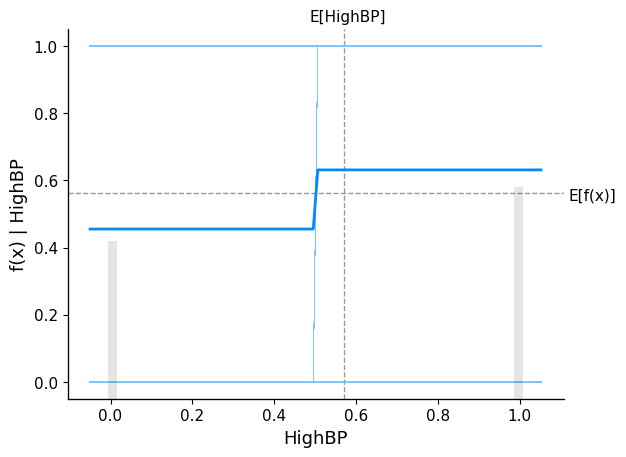

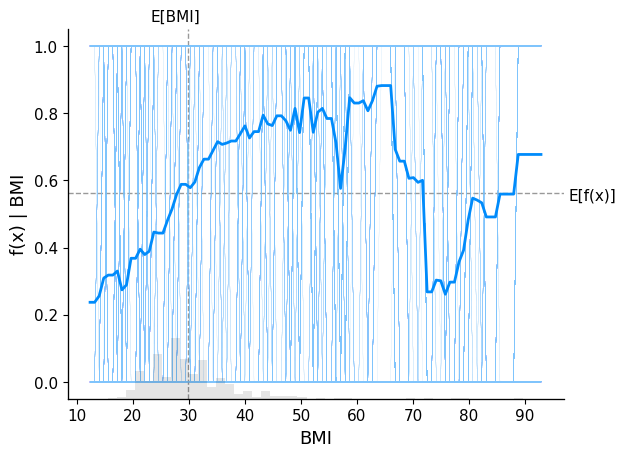

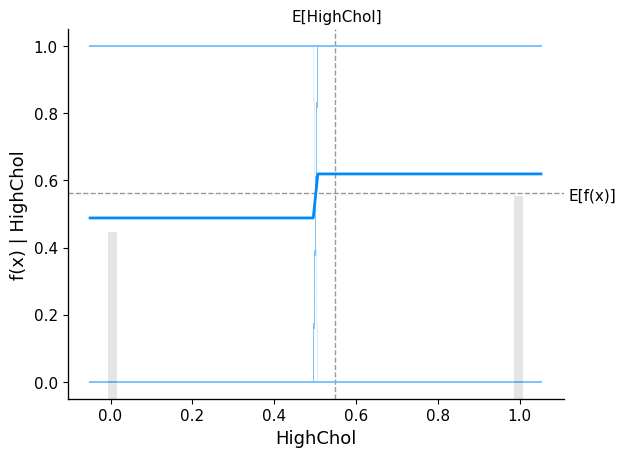

In [70]:
shap_values = np.array(shap_values)

# Genera una muestra de datos
X1000 = shap.utils.sample(X_train, 1000)

# Calcula los valores de SHAP
shap_values = explainer.shap_values(X1000)

# Genera el gráfico de dependencia parcial
shap.partial_dependence_plot('Age', model.predict, X1000, model_expected_value=True, feature_expected_value=True)
shap.partial_dependence_plot('GenHlth', model.predict, X1000, model_expected_value=True, feature_expected_value=True)
shap.partial_dependence_plot('HighBP', model.predict, X1000, model_expected_value=True, feature_expected_value=True)
shap.partial_dependence_plot('BMI', model.predict, X1000, model_expected_value=True, feature_expected_value=True)
shap.partial_dependence_plot('HighChol', model.predict, X1000, model_expected_value=True, feature_expected_value=True)


# Respuesta
debtro de la interpretación esta depende de cada variable. En general, un PDP muestra la relación entre una variable y la salida del modelo, considerando la influencia de las demás variables. Puede revelar tendencias, relaciones lineales o no lineales, y el impacto relativo de una variable en la predicción del modelo.asi se logra analizar que para cada  gráfico  se muestra cómo varía la predicción promedio de ser diabético en función de la variable en cuestión, manteniendo constantes las demás características. En general, a medida que aumenta la variable, aumenta la predicción de ser diabético, pero con comportamientos diferentes según cada variable. Algunas variables muestran un aumento constante, mientras que otras tienen un comportamiento escalonado debido a su naturaleza categórica. Sin embargo, se observa un comportamiento inusual en la variable BMI, donde para valores altos de 70 disminuye la predicción y luego vuelve a aumentar.


por ultimo hay que tener en cuenta que las conclusiones obtenidas se basan en el modelo y el conjunto de datos específicos utilizados. No se puede asumir que estas conclusiones son generalizablespara todo el conjunto de datos o para otros escenarios. y es recomendable validar y evaluar las conclusiones del PDP en diferentes conjuntos de datos y contextos para garantizar su generalización

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [73]:
!pip install alibi
from alibi.explainers import AnchorTabular
from alibi.datasets import fetch_adult



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00


In [100]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

predict_fn = lambda x: model.predict(x)
explainer = AnchorTabular(predict_fn, model.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]
class_names = ["Sano", "Diabetico"]

In [102]:
threshold=0.95

idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)



idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Diabetico
Anchor: Age > 11.00 AND HeartDiseaseorAttack > 0.00 AND BMI > 25.00
Precision: 0.98
Coverage: 0.03
Prediction:  Diabetico
Anchor: BMI > 33.00 AND HighBP > 0.00 AND GenHlth > 2.00
Precision: 0.98
Coverage: 0.15
Prediction:  Sano
Anchor: GenHlth <= 2.00 AND HighBP <= 0.00 AND BMI <= 25.00
Precision: 0.99
Coverage: 0.11


#Respuesta
vemos que para el paciente 1000 se arroja que es diabetico  con las siguentes reglas Age > 11.00 AND HeartDiseaseorAttack > 0.00 AND BMI > 25.00 y una  Precision: 0.98 y Covertura de 0.03
asi  Según esta regla, si la edad es mayor a 11, hay presencia de enfermedad cardíaca o ataque al corazón, y el índice de masa corporal (BMI) es mayor a 25, entonces el modelo predice que la persona es diabética.

para el paciente 3001  se predice como  diabetico con la relga BMI > 33.00 AND HighBP > 0.00 AND GenHlth > 2.00, una Precision de  0.98 y covertura  0.15.En este caso, la regla indica que si el BMI es mayor a 33, hay presencia de presión arterial alta (HighBP) y el estado de salud general (GenHlth) es mayor a 2, entonces el modelo predice que la persona es diabética.

para el paciente 5751 se predice como   Sano , con una regla GenHlth <= 2.00 AND HighBP <= 0.00 AND BMI <= 25.00, una Precision de  0.99 y una covertura de  0.11, la regla establece que si el estado de salud general es menor o igual a 2, no hay presencia de presión arterial alta y el BMI es menor o igual a 25, entonces el modelo predice que la persona es sana.

segun las reglas declaradas para el caso uno solo podriamos predcir  para un 3 % de la poblacion con una precision del 98%, para el caso dos  se  podria predecir como diabeticos al 15% de los paciente que cumplen esta reglas con una precision del 98% y para el caso 3  usan esta regla se podria explicar 11% de los pacientes con una precision del 99%


Asi dado que la cobertura es baja, las reglas propuestas pueden no ser generalizables para todo el conjunto de datos.

por ultimo cabe mencionar que si tienen sentido las reglas obtenidas

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

##Respuesta
 Al comparar los métodos, si el modelo elegido (en este caso xgboost) tiene buenas métricas como precisión, recall y precisión superiores a 0.8, es más eficiente utilizar métodos agnósticos globales. Estos métodos proporcionan una visión general del modelo y cómo las diferentes variables influyen en las predicciones de manera global. Pueden ser útiles para comprender las características más importantes en el conjunto de datos y tener una idea general de cómo funciona el modelo.

Sin embargo, si el modelo tiene métricas inferiores a 0.8, puede ser más eficiente y efectivo utilizar métodos como sistemas de reglas o métodos agnósticos locales. Estos métodos se centran en el análisis individual de las instancias y permiten identificar patrones y reglas específicas que se ajustan a cada observación. Esto puede ser especialmente útil cuando el objetivo es minimizar los falsos negativos, es decir, predecir correctamente a una persona diabética como tal.

Dado que el modelo xgboost utilizado en este caso no obtuvo métricas superiores a 0.8, se recomendaría al Dr. Simi utilizar métodos agnósticos locales para mejorar la precisión y la interpretación de las predicciones. Estos métodos permitirán un análisis más detallado de las instancias individuales y ayudarán a identificar características y patrones específicos que contribuyan a una mejor predicción en cada caso.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>